## <center>NBA Analytics Data Analysis Project<center>
#### <center>presented by Brian Zamkotowicz for Springboard Capstone Project<center>


This phase of the NBA Analytics project will begin to explore the data that was cleaned in the the Data Wrangling portion of the project.  It will ask and attempt to answer questions about the data, and specifically about the relationship between NBA adavanced metrics and teams wins in the NBA.

In [2]:
import pandas as pd

# the first step is to un-pickle the data that was saved at the end of the Data Wrangling Notebook

hoops_data = pd.read_pickle('C://Users/Home Office/hoops_data.pickle')
hoops_data.head()

,Tm,Year,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta
0,ATL,2011,3.772002,43.820121,16.6,224.1,44.886630,16.9,4.484426,213.1,ATL,2011,44,NaN
1,ATL,2012,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0
2,ATL,2013,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0
3,ATL,2014,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0
4,ATL,2015,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0


In [3]:
# Drop the rows with NaN values, as they will not be useful for further analysis

hoops_data = hoops_data.dropna()


In [4]:
#insert a column with previous year's wins for later use

hoops_data['prev_wins'] = hoops_data['W']- hoops_data['Win_Delta']
hoops_data.head(2)

,Tm,Year,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,prev_wins
1,ATL,2012,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,44.0
2,ATL,2013,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,40.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_context("talk")


The following figures will attempt to begin to explore the relationship between a teams offseason change in the advanced metrics, WORP, VORP, PER and Box Plus Minus (adjusted for time) or BPM_A and change in wins the next season.

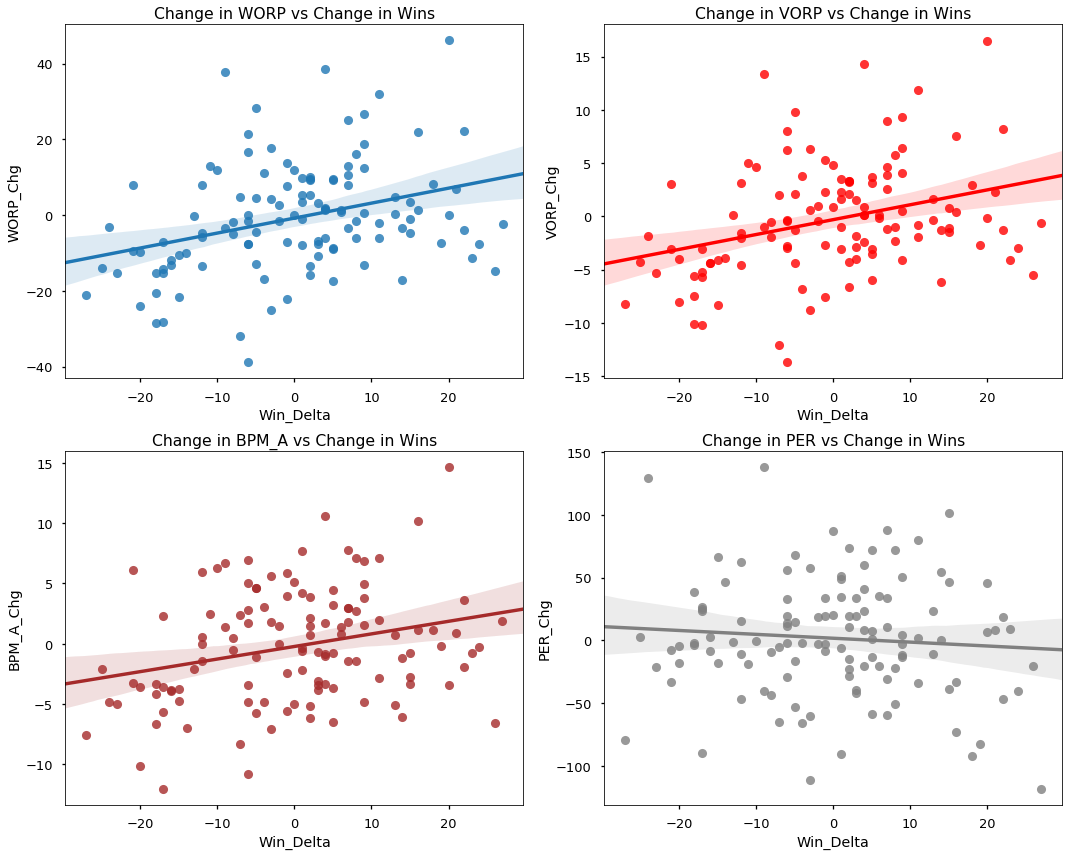

In [45]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,2,1)
sns.regplot(y="WORP_Chg", x="Win_Delta", data=hoops_data, fit_reg = True)
plt.title ('Change in WORP vs Change in Wins')

ax2 = fig.add_subplot (2,2,2)
sns.regplot(y="VORP_Chg", x="Win_Delta", data=hoops_data, fit_reg = True, color = 'red')
plt.title ('Change in VORP vs Change in Wins')

ax3 = fig.add_subplot(2, 2, 3)
sns.regplot(y="BPM_A_Chg", x="Win_Delta", data=hoops_data, fit_reg = True, color = 'brown')
plt.title ('Change in BPM_A vs Change in Wins')

ax4 = fig.add_subplot(2, 2, 4)
sns.regplot(y="PER_Chg", x="Win_Delta", data=hoops_data, fit_reg = True, color = 'gray')
plt.title ('Change in PER vs Change in Wins')

plt.tight_layout()

An initial look at the data seems to indicate that WORP, VORP, and BPM_A, bear a somewhat linear relationship to change in wins, but PER seems either unrelated or negatively related.

To truly understand how the explored variables effect Win Delta, it is also important to have an understanding of the Win Delta statistic itself.  

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


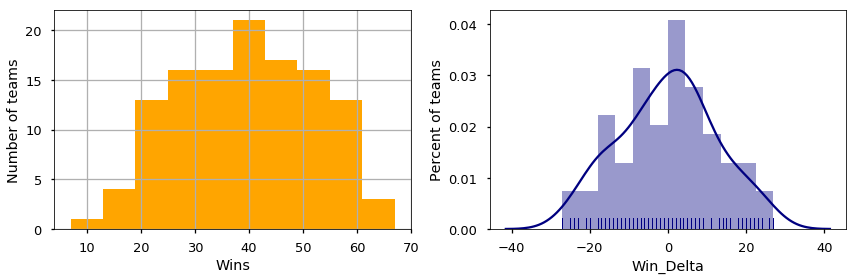

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot (1,2,1)
plt.ylabel('Number of teams')
plt.xlabel('Wins')
hoops_data['W'].hist(figsize = [12,4], color = 'orange')

ax3 = fig.add_subplot (1,2,2)
plt.ylabel('Percent of teams')
plt.xlabel('Win Delta')
sns.distplot(hoops_data['Win_Delta'], kde = True, rug = True, color = 'navy', bins = 12)
plt.tight_layout()

This histogram and density plot above both show a fairly normal distribution. The histogram on the left shows that teams are normally distributed around winning about half of their games.  The density plot on the right indicates a normal distribution of win delta around zero.  This means that teams tend to do around the same from year to year, and that large changes in win totals are unusual.

I also suspect that NBA teams with low win totals tend to improve and teams with high win totals tend to do worse the next year, just based on possible outcomes.  For example the  2015 Golden State won a record 73 games.  At best they could win 9 more games (in an 82 game NBA season) the next year, and  at worst they could lose 73 more games.  The distribution of possible outcomes implies they are more likey to do worse or 'regress to the mean'.  A simple scatter plot should show whether this is the case.


I suspect a regression plot will show that win delta to be negatively related to wins in the previous year, showing the regression to the mean of NBA teams in terms of wins.

Text(0.5,1,'Change in Wins by Previous Year Win Total')

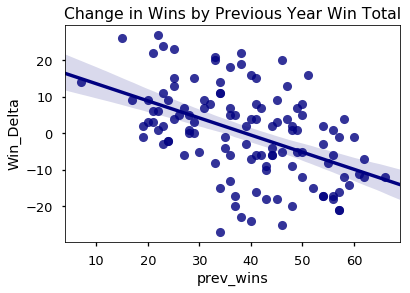

In [46]:
#show the relationship between previous year wins and win delta

sns.regplot(x ="prev_wins", y="Win_Delta", data=hoops_data, fit_reg = True, color = 'navy')
plt.title('Change in Wins by Previous Year Win Total')

This regression plot is very telling.  It shows a definite 'regression to the mean'  meaning that NBA teams with high win totals tend to do worse the next year and vice versa for teams that struggled.  This is an important consideration, especially at the high and low end of the spectrum.  The previously mentioned 2015 Golden State Warriors that won a record 73 games would be hard pressed improve, regardless of adding additional WORP or VORP through free agency.

There are other factors that may affect performance in the coming season.  One factor that may impact performance in the coming season, causing it to differ from the previous season is age.

In [11]:
# unpack the individual data from the Data Wrangling notebook

bball_data = pd.read_pickle('C://Users/Home Office/bball_data.pickle')
bball_data.head()

,Year,Tm,Player,Age,Use_Year,BPM,VORP,WORP,BPM_A,PER,G,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg
10,2011,ATL,Jeff Teague,22.0,2011,-3.9,-0.3,-1.066509,-0.712424,11.0,71.0,0.000000,0.0,0.000000,0.0
30,2012,ATL,Josh Smith,26.0,2012,2.9,3.3,9.327586,1.948806,19.2,77.0,-5.410306,-1.9,-1.844182,-1.8
31,2012,ATL,Jeff Teague,23.0,2012,-1.8,0.0,0.155495,-0.440396,14.6,70.0,1.222004,0.3,0.272027,3.6
32,2012,ATL,Joe Johnson,30.0,2012,0.0,1.3,3.187169,0.000000,16.4,72.0,-4.990367,-1.7,-1.613110,-2.9
33,2012,ATL,Zaza Pachulia,27.0,2012,-1.3,0.2,0.437940,-0.410874,12.4,79.0,-0.354585,-0.2,-0.217200,-0.7


In [12]:
AVG_WORP = pd.DataFrame(bball_data.groupby(['Age'], as_index = False)['WORP','VORP', 'BPM_A', 'PER'].mean())
print(AVG_WORP)                 

     Age      WORP      VORP     BPM_A        PER
0   20.0  0.461243  0.157895 -0.400666  13.126316
1   21.0  0.769197  0.318182 -0.356862  12.021818
2   22.0  0.570406  0.236283 -0.331474  12.055752
3   23.0  1.055402  0.395050 -0.174415  12.930693
4   24.0  1.321391  0.492105 -0.045838  12.824561
5   25.0  1.535976  0.564486  0.006256  13.121028
6   26.0  2.260054  0.832804  0.133034  13.749206
7   27.0  2.207455  0.805028  0.112097  13.798324
8   28.0  2.265960  0.821379  0.107823  14.111034
9   29.0  2.944854  1.062500  0.260288  14.420000
10  30.0  1.838230  0.683495  0.062473  13.547573
11  31.0  1.606296  0.600000  0.008390  12.400980
12  32.0  1.496352  0.571579 -0.101647  12.697895
13  33.0  1.736526  0.673913 -0.015712  12.460870
14  34.0  1.766734  0.670000 -0.007806  12.316000
15  35.0  2.584586  0.941667  0.301593  13.777778
16  36.0  3.435266  1.247619  0.429505  14.842857
17  37.0  3.062036  1.118182  0.329512  14.404545
18  38.0  1.406964  0.525000 -0.013708  13.105000


Another factor that may affect performance on a year over year basis is age.  It is worth looking at the age of NBA players and how it relates to the aforementioned metrics, as it might be able to provide some forward-looking guidance.

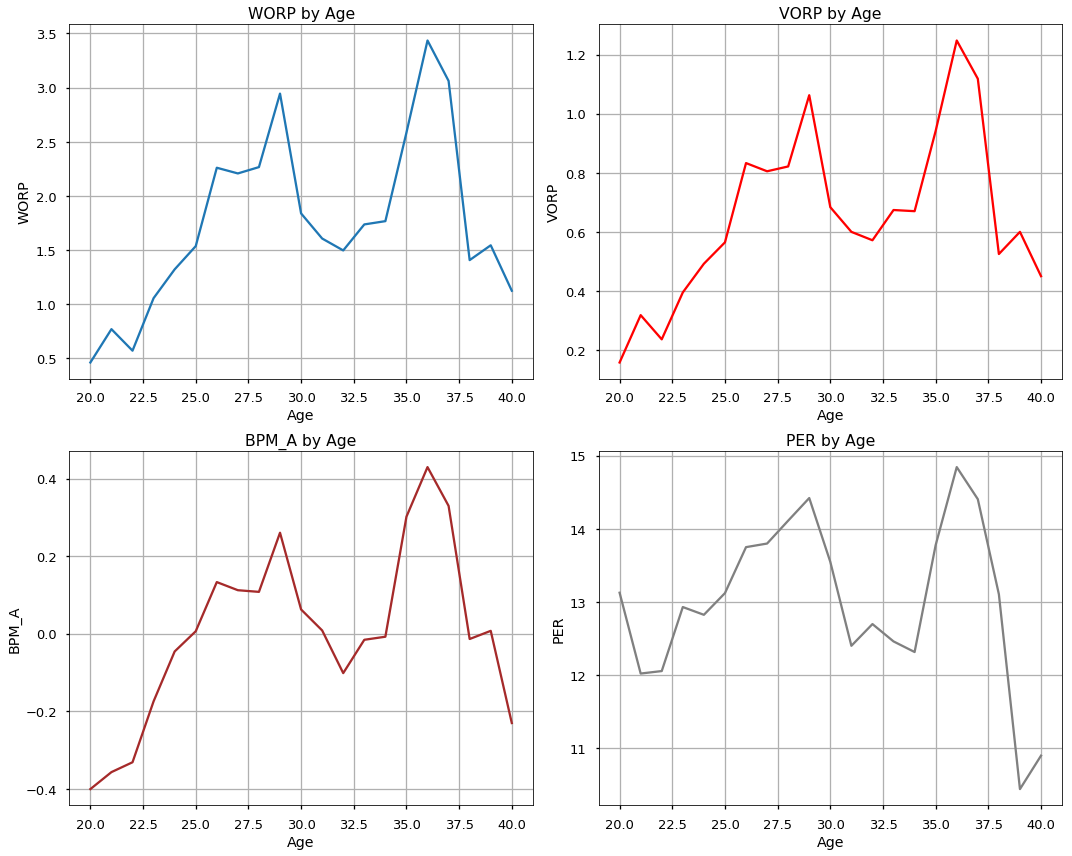

In [42]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,2,1)
plt.plot(AVG_WORP['Age'], AVG_WORP['WORP'])
plt.xlabel('Age')
plt.ylabel('WORP')
plt.grid()
plt.title('WORP by Age')

ax2 = fig.add_subplot (2,2,2)
plt.xlabel('Age')
plt.ylabel('VORP')
plt.plot(AVG_WORP['Age'], AVG_WORP['VORP'], color = 'red')
plt.grid()
plt.title('VORP by Age')

ax3 = fig.add_subplot (2,2,3)
plt.plot(AVG_WORP['Age'], AVG_WORP['BPM_A'], color = 'brown')
plt.xlabel('Age')
plt.ylabel('BPM_A')
plt.grid()
plt.title('BPM_A by Age')

ax4 = fig.add_subplot (2,2,4)
plt.plot(AVG_WORP['Age'], AVG_WORP['PER'], color = 'gray')
plt.xlabel('Age')
plt.ylabel('PER')
plt.grid()
plt.title('PER by Age')

plt.tight_layout()

Intuitively, I would have expected this curve to be roughly bell shaped.  After the peak after at 29 I would expect it to tail off.  Since players start to retire at that age to some extent only "better" players (with higher statistics) remain in the league the curve might taper less steeply than if we exlored a specific group of players over the period, but the spike at 35 to 38 definitely appear to be anamolous.

In [19]:
exam36 = (bball_data[bball_data['Age'] == 36])
print(exam36)
print(exam36)

      Year   Tm            Player   Age  Use_Year  BPM  VORP       WORP  \
44    2012  ATL     Erick Dampier  36.0      2012  0.3   0.5   1.257929   
181   2012  BOS         Ray Allen  36.0      2012  3.5   4.0  11.053808   
200   2013  BOS     Kevin Garnett  36.0      2013  3.1   3.0   8.771423   
375   2014  BRK       Paul Pierce  36.0      2014  3.3   3.4   9.368872   
387   2014  BRK       Jason Terry  36.0      2014 -0.5   0.8   2.022063   
621   2014  CHI     Nazr Mohammed  36.0      2014 -2.7  -0.1  -0.396772   
690   2012  CLE    Anthony Parker  36.0      2012 -1.6   0.2   0.594577   
777   2015  CLE      Shawn Marion  36.0      2015  1.1   1.9   5.009502   
837   2013  DAL      Vince Carter  36.0      2013  0.7   1.3   3.417753   
879   2015  DAL     Dirk Nowitzki  36.0      2015  2.8   3.2   9.454561   
954   2013  DEN      Andre Miller  36.0      2013 -0.5   0.9   1.892427   
1512  2013  LAC  Chauncey Billups  36.0      2013 -0.1   0.4   0.845065   
1600  2013  LAL    Antawn

In [20]:
# count number of 36 year old players in sample
print(exam36['Player'].count())

21


In [21]:
# count number of 24 year old players in sample

bball_data[bball_data['Age'] == 24].count()

Year         228
Tm           228
Player       228
Age          228
Use_Year     228
BPM          228
VORP         228
WORP         228
BPM_A        228
PER          228
G            228
WORP_Chg     228
VORP_Chg     228
BPM_A_Chg    228
PER_Chg      228
dtype: int64

We have a sample of 348 24 year old players but only 26 36 year old players.  The data on player age and its effect on statistical progression seems to be heavily affected by retiring players. Players with below average statistics tend to not remain in the NBA at advanced ages.  On top of that, the sample size of older players is too small and is heavily affected by one or 2 players having exceptional seasons.

One way to counteract the effect of only exceptional players remaining in the NBA at advanced ages might be to look at the change in advanced metrics instead of the actual scores in those statistics.  While the players might still be above average, I wouldn't expect them to show improvement at those ages.

In [22]:
AVG_CHG = pd.DataFrame(bball_data.groupby(['Age'], as_index = False)['WORP_Chg','VORP_Chg', 'BPM_A_Chg', 'PER_Chg'].mean())
print(AVG_CHG) 

     Age  WORP_Chg  VORP_Chg  BPM_A_Chg   PER_Chg
0   20.0  0.047020  0.010526   0.031722  0.221053
1   21.0  0.363562  0.136364   0.071990  0.389091
2   22.0  0.319685  0.112389   0.046584  0.545133
3   23.0  0.416289  0.142574   0.105978  0.231188
4   24.0  0.439014  0.160965   0.159634 -0.201754
5   25.0  0.391007  0.130841   0.165193  0.082243
6   26.0  0.374106  0.134392   0.136488  0.246561
7   27.0 -0.350899 -0.121229  -0.052052 -0.646369
8   28.0 -0.272396 -0.107586   0.042980 -0.457931
9   29.0 -0.166534 -0.059167   0.018328 -0.350000
10  30.0 -1.162188 -0.402913  -0.224480 -1.180583
11  31.0 -0.425523 -0.154902  -0.015137 -0.607843
12  32.0 -0.878657 -0.312632  -0.186987 -1.147368
13  33.0 -0.959612 -0.331884  -0.157060 -0.737681
14  34.0 -0.637267 -0.244000  -0.131145 -1.382000
15  35.0 -0.491679 -0.180556  -0.085728  0.088889
16  36.0 -1.065272 -0.380952  -0.288107 -1.400000
17  37.0 -1.026802 -0.381818  -0.235153 -1.050000
18  38.0 -2.166899 -0.775000  -0.348068 -1.450000


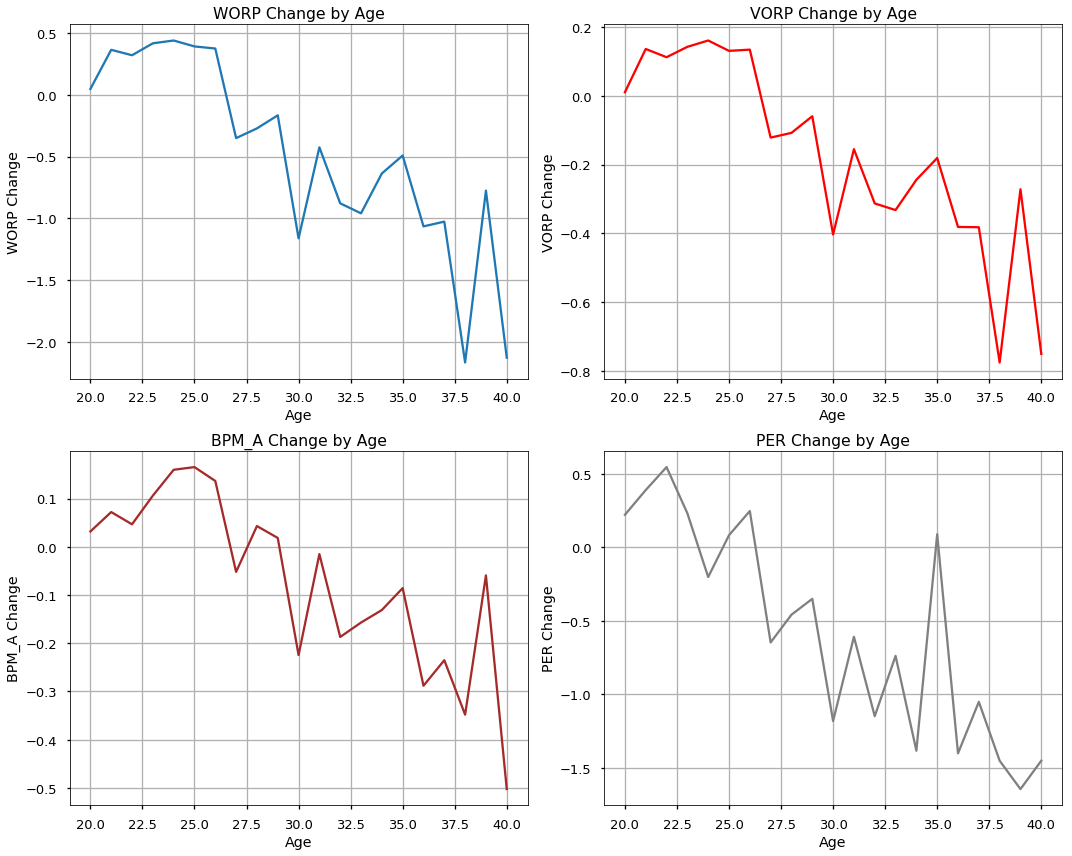

In [43]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,2,1)
plt.plot(AVG_CHG['Age'], AVG_CHG['WORP_Chg'])
plt.xlabel('Age')
plt.ylabel('WORP Change')
plt.title('WORP Change by Age')
plt.grid()
ax2 = fig.add_subplot (2,2,2)
plt.plot(AVG_CHG['Age'], AVG_CHG['VORP_Chg'], color = 'red')
plt.xlabel('Age')
plt.ylabel('VORP Change')
plt.title('VORP Change by Age')
plt.grid()
ax3 = fig.add_subplot (2,2,3)
plt.plot(AVG_CHG['Age'], AVG_CHG['BPM_A_Chg'], color = 'brown')
plt.xlabel('Age')
plt.ylabel('BPM_A Change')
plt.title('BPM_A Change by Age')
plt.grid()
ax4 = fig.add_subplot (2,2,4)
plt.plot(AVG_CHG['Age'], AVG_CHG['PER_Chg'], color = 'gray')
plt.xlabel('Age')
plt.ylabel('PER Change')
plt.title('PER Change by Age')
plt.grid()

plt.tight_layout()

The data looks a bit more like what I expected, with statistical prowess peaking around age 25 then declining, but still seems to have issues in the 35 and 36 range.  I think it's just a matter of a sample size that small being moved by one or two outstanding performances.  It might be worth looking at the data for those records to see if that may be the case.

In [24]:
exam_chg = (bball_data[bball_data['Age'] > 34])
exam_chg.sort_values(['WORP_Chg'], ascending = False)


,Year,Tm,Player,Age,Use_Year,BPM,VORP,WORP,BPM_A,PER,G,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg
1623,2014,LAL,Kobe Bryant,35.0,2014,4.5,4.9,13.730343,3.444741,23.0,78.0,5.671056,1.9,2.140473,1.1
879,2015,DAL,Dirk Nowitzki,36.0,2015,2.8,3.2,9.454561,1.869512,23.6,80.0,5.331045,1.8,1.320910,3.8
181,2012,BOS,Ray Allen,36.0,2012,3.5,4.0,11.053808,2.569868,16.4,80.0,3.994095,1.4,1.352312,1.2
865,2014,DAL,Vince Carter,37.0,2014,2.7,2.5,6.907744,1.435747,17.8,81.0,3.489991,1.2,1.161509,4.2
1295,2012,HOU,Earl Boykins,35.0,2012,-1.1,0.2,0.605276,-0.240904,17.6,57.0,2.652323,0.9,1.036153,4.7
180,2012,BOS,Kevin Garnett,35.0,2012,3.6,3.1,9.111655,2.030488,20.6,71.0,2.645177,0.9,0.879065,1.2
2796,2014,SAS,Tim Duncan,37.0,2014,3.6,2.9,8.573665,1.900610,24.4,69.0,2.507040,0.8,1.028811,1.9
1406,2012,IND,Jeff Foster,35.0,2012,2.1,1.0,2.607659,0.501524,14.3,56.0,2.494417,0.9,0.566311,4.7
1815,2015,MIA,Chris Andersen,36.0,2015,1.3,1.1,3.407995,0.461077,18.5,72.0,2.035227,0.6,0.302541,1.1
837,2013,DAL,Vince Carter,36.0,2013,0.7,1.3,3.417753,0.274238,13.6,61.0,1.930077,0.7,0.379954,-0.6


In [30]:
bball_data[bball_data['Age'] > 34].describe()

,Year,Age,Use_Year,BPM,VORP,WORP,BPM_A,PER,G,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2013.407407,36.509259,2013.407407,-0.195370,0.928704,2.534671,0.244841,13.718519,52.416667,-1.071140,-0.387037,-0.210103,-0.858333
std,1.135963,1.384125,1.135963,2.601918,1.138375,3.220857,0.841406,5.044793,22.030194,2.599233,0.913870,0.763971,3.028961
min,2012.000000,35.000000,2012.000000,-7.500000,-0.300000,-1.105291,-0.905716,0.000000,2.000000,-14.204249,-5.000000,-3.665091,-12.300000
25%,2012.000000,35.000000,2012.000000,-2.025000,0.000000,-0.018040,-0.353277,9.975000,33.500000,-2.629202,-0.900000,-0.704421,-2.800000
50%,2013.000000,36.000000,2013.000000,0.000000,0.500000,1.430222,0.000000,14.100000,56.500000,-0.526598,-0.200000,-0.177071,-0.800000
75%,2014.000000,38.000000,2014.000000,1.725000,1.600000,4.374436,0.574365,16.950000,71.250000,0.333235,0.100000,0.231917,0.600000
max,2015.000000,40.000000,2015.000000,6.000000,4.900000,13.730343,3.444741,24.400000,82.000000,5.671056,1.900000,2.140473,7.900000


The entire data set of players 35 and up is only 108 players.  This amount of data is going to be unduly influenced by one or 2 records.

<function matplotlib.pyplot.show(*args, **kw)>

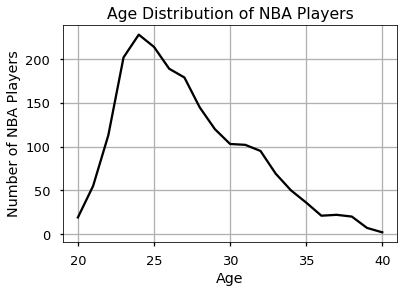

In [32]:
# count and graph the number of players of each age in the NBA

age_count = bball_data.groupby(['Age']).size().reset_index(name='players')
plt.plot(age_count['Age'], age_count['players'], color = 'black')
plt.ylabel('Number of NBA Players')
plt.xlabel('Age')
plt.title('Age Distribution of NBA Players')
plt.grid(True)
plt.show

The bulk of players in the NBA appear to be in their mid 20's. Since players tend to be forced out of the league as they age, and thus have no data as their skills decline due to age, it seems like it may be impossible to create a variable predicting future performance with the data set we currently have.  It is also unsurprising that the curve for age distribution peaks at age 24, around the same time that performance metrics also tend to peak.


Overall these analyses have yielded some interesting results.  Changing a team's WORP, VORP, and BPM_A in the offseason seems related to a change in wins the following year, PER, however does not.  It also seems that most teams tend to win about half of their games each year and generally show only relatively small changes in their number of winss on a year over year basis.  Teams also seem to regress to the mean number of wins based on their previous year win total.  Finally, the exploration of player age was not quite what was expected.  While the curves for change by age of the advanced metrics seemed to peak around 24 and then gradually decline, the graphs for the stats themselves were radically different.  They showed players peaking around age 29, and players excelling well into their 30's.  As discussed earlier, this is most like the result of sample bias, as well as a very small sample, as only exceptional players remain in the leauge at these advanced ages.